## Welcome!

### Some Google Colab hacks
* To run a cell, hit `Ctrl + Shift + Enter`
* To run the whole sheet, hit `Ctrl + F9`
* To run the cells above, hit `Ctrl + F8`
* To run the cells below, hit `Ctrl + F10`


# Install and import `pygismo` and other packages

`pygismo` is a small package, unknown to Google. Therefore, we have to install it locally inside the Notebook

In [ ]:
# !pip install pygismo

# We use the development version of pygismo
from google.colab import drive
drive.mount('/content/drive/')

!pip install "/content/drive/MyDrive/Google Colab/pygismo/wheels/pygismo-23.9.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl"

Now we can import it as a package

In [ ]:
!pip install pygismo
import pygismo as gs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 25.9 MB/s eta 0:00:00


We also import `numpy` and `matplotlib`

In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import cm
from mpl_toolkits.mplot3d import axes3d

For this example, we also use a file from the drive. Therefore, we mount our Google Drive

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive/')

# Constructing a 2D basis

We use the same B-spline basis as in the previous example, with knot vectors:

$\Xi_u = \Xi_v = \{0,0,0,0.25,0.50,0.75,1,1,1\}$


In [ ]:
kv_u = kv_v = gs.nurbs.gsKnotVector(np.array([0,0,0,0.25,0.50,0.75,1,1,1]),2)
tbasis = gs.nurbs.gsTensorBSplineBasis2(kv_u,kv_v)

# Loading the point data

The data for fitting is stored in two files: `shiphull_pars.csv` and `shiphull_points.csv`. We read them into `numpy.matrix` objects as follows:


In [ ]:
pars   = np.loadtxt("/content/drive/MyDrive/Google Colab/pygismo/filedata/shiphull_pars.csv",delimiter=",")
points = np.loadtxt("/content/drive/MyDrive/Google Colab/pygismo/filedata/shiphull_points.csv",delimiter=",")

# Fitting a surface through the point cloud

As for the curve fitting problem, we use `pygismo.modelling.gsFitting` to solve the fitting problem:

In [ ]:
fitter = gs.modelling.gsFitting(pars,points,tbasis)

Then, the fit is computed by calling `compute()`

In [ ]:
fitter.compute()

And the result is obtained by calling `result()`.

In [ ]:
fit = fitter.result()

print(fit.coefs())

[[ 1.93249666e-01  8.16700782e-01  8.16966596e-01]
 [ 2.85104475e-01  8.17040247e-01  8.16899199e-01]
 [ 3.68274380e-01  8.16096186e-01  8.17019477e-01]
 [ 5.32462655e-01  8.17260386e-01  8.16741526e-01]
 [ 6.89848653e-01  8.14826208e-01  8.17211446e-01]
 [ 8.16516484e-01  8.13619944e-01  8.17597024e-01]
 [ 1.73613372e-01  8.17172690e-01  8.15355853e-01]
 [ 2.67448058e-01  8.31785120e-01  8.15972422e-01]
 [ 3.51660786e-01  8.60992223e-01  8.14093748e-01]
 [ 5.25708681e-01  9.10214611e-01  8.15113221e-01]
 [ 6.75195016e-01  9.46408512e-01  8.14715747e-01]
 [ 8.15059330e-01  9.43299489e-01  8.14986447e-01]
 [ 1.40368736e-01  8.17150398e-01  8.53802820e-01]
 [ 2.42483716e-01  8.42259720e-01  8.55168509e-01]
 [ 3.34269193e-01  8.85810440e-01  8.53934073e-01]
 [ 5.10655151e-01  9.52467621e-01  8.54861929e-01]
 [ 6.88033427e-01  9.85882752e-01  8.54058170e-01]
 [ 8.14779912e-01  9.84165112e-01  8.54131225e-01]
 [ 1.07831888e-01  8.17090233e-01  8.99826174e-01]
 [ 1.74785632e-01  8.53461356e-

In [ ]:
predictions = fit.eval(pars)
mse = ((predictions - points) ** 2).mean()
print(mse)

1.9939592891650604e-06


# Plotting the result in Python

Now we plot the result using `matplotlib`. The plotting procedure is as in the other examples, i.e. we use a `numpy.meshgrid` to define our evaluation points:

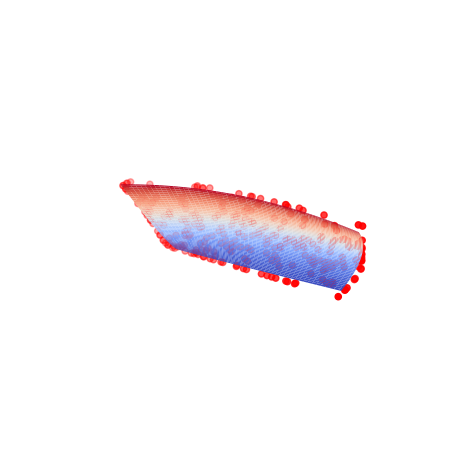

In [ ]:
N = M = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,M)

XX, YY = np.meshgrid(x,y,indexing='xy')
pts = np.stack((XX.flatten(),YY.flatten()))

S = fit.eval(pts)
XX = S[0,:].reshape((N,M))
YY = S[1,:].reshape((N,M))
ZZ = S[2,:].reshape((N,M))

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
ax.plot_surface(XX,YY,ZZ,cmap=cm.coolwarm)
ax.scatter(points[0,:],points[1,:],points[2,:],color="red")

ax.axis('equal')
ax.axis('off')

fig.tight_layout()
plt.show()

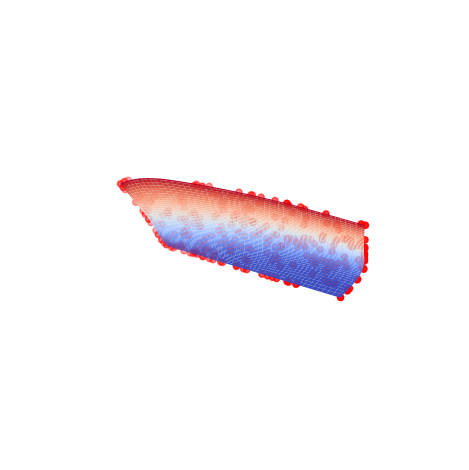

In [ ]:
N = M = 100
x = np.linspace(0,1,N)
y = np.linspace(0,1,M)

XX, YY = np.meshgrid(x,y,indexing='xy')
pts = np.stack((XX.flatten(),YY.flatten()))

S = fit.eval(pts)
XX = S[0,:].reshape((N,M))
YY = S[1,:].reshape((N,M))
ZZ = S[2,:].reshape((N,M))

fig = plt.figure()
ax = fig.add_subplot(projection ='3d')
ax.plot_surface(XX,YY,ZZ,cmap=cm.coolwarm)
ax.scatter(points[0,:],points[1,:],points[2,:],color="red")

ax.axis('equal')
ax.axis('off')

fig.tight_layout()
plt.show()

# Plotting the result in Paraview

Alternatively, we can use Paraview to plot our surface. We simply use `pygismo`'s buit-in functionality

In [ ]:
gs.io.gsWriteParaview(fit,"/content/drive/MyDrive/Google Colab/pygismo_demo/output/fit")
pointsT = points.T
gs.io.gsWriteParaviewPoints(np.matrix(pointsT[:,0]),np.matrix(pointsT[0,:]),np.matrix(pointsT[0,:]),"/content/drive/MyDrive/Google Colab/pygismo_demo/output/points")

This creates the files `surf0.vts` and `surf.pvd`. When we open `surf.pvd` in paraview, we see the surface.